In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a Time Series

In time series analysis, it is often assumed that a series can be decomposed as:

$$data = trend + seasonality + noise$$

To generate a synthetic series under this assumption:

## **White Noise**  
Generate a series of white noise: i.i.d. random variables drawn from a standard normal distribution: $\epsilon_t \sim N(0,1)$

## **AR($p$) Process**  
Construct an AR($p$) process driven by the generated white noise $\epsilon_t$.

$$X_t = \sum_{i = 1}^{p}\phi_iX_{t-i} + \epsilon_t$$

There are two equivalent formulations for the characteristic polynomial of an AR($p$) process—via the Z-transform or via the backshift operator.

1. **Z-transform**
   $$\mathcal{Z}\{X_t\}(1 - \sum_{i=1}^{p}\phi_i*z^{-i}) = \mathcal{Z}\{\epsilon_t\}, z\in\mathbb{C}$$
   where
   $$1 - \sum_{i=1}^{p}\phi_i*z^{-i} = 0$$
   defines the characteristic polynomial (a real-valued polynomial in $z$).
   - For the AR(p) process to be stationary, all solutions (roots) of the characteristic polynomial must lie outside of the unit circle $|z|>1$
   - If any roots are complex, they must occur in complex conjugate pairs, because the $\phi_i$ are real.
   - If $p$ is odd, at least one root is necessarily real.
    These conditions arise because $\{X_t\}$ is assumed to be a real-valued process, implying real coefficients $\phi_i$.
2. **Backshift operator**

   The backshift operator is defined as
   $$L^kX_t = X_{t-k}$$
   The AR(p) process equation can be rewritten as
   $$X_t(1-\sum_{i=1}^p\phi_iL^i) = \epsilon_t$$
   where $$1-\sum_{i=1}^p\phi_iL^i = 0$$
   is the same characteristic polynomial, with $L$ corresponding to $z^{-1}$ from the Z-transform approach.

### Generating an AR($p$) Process

To generate an AR($p$) process:

1. **Generate the roots ensuring stationarity**  
   Generate the roots $\{L_i\}_{i=1}^p$ of the polynomial in the backshift operator $L$,

2. **Compute AR Coefficients via Vieta’s Formulas**  
   Suppose the polynomial factors as

   $$\prod_{i=1}^p(1 - L_i L) = 1 - \phi_1 L - \phi_2 L^2 - \dots - \phi_p L^p$$

   By expanding the product on the left and matching coefficients term-by-term, we obtain Vieta’s relations for $\phi_i$:

   $$\phi_1 = \sum_{i=1}^p L_i,$$

   $$\phi_2 = -\sum_{1 \le i < j \le p} L_i L_j,$$

   $$\phi_3 = \sum_{1 \le i < j < k \le p} L_i L_j L_k,$$

   and so forth, alternating signs. In general,

   $$\phi_m = (-1)^m \sum_{1 \le i_1 < i_2 < \dots < i_m \le p} L_{i_1} L_{i_2} \dots L_{i_m}$$

3. **Simulate Data**
   - Given $\phi_1, \phi_2, \dots, \phi_p$ and a white noise process $\{\epsilon_t\}$, initialize $X_1, \dots, X_p$ to zeros.  
   - Compute
     $$X_t = \sum_{i=1}^p \phi_i X_{t-i} + \epsilon_t, \quad t = p+1, p+2, \dots$$
   - To obtain a time series of length $T$, generate $T+M$ data points and discard the first $M$ values to remove the influence of the initial zeros.  
   - $M$ is set to $10p$ to ensure minimal impact from initialization.

This procedure yields a stationary AR($p$) time series $\{X_t\}$.

## **Quadratic Trend**  
Add a quadratic trend that is “centered,” meaning its minimum (or maximum) is placed around the midpoint of the time series. This is done by shifting the time index $t$ so that $t = 0$ occurs near the center, thereby avoiding excessively large values at either end.

## **Seasonality (TODO)**  

This approach produces a synthetic time series with a specified trend, seasonality, and correlated noise structure.

In [51]:
# Y years of daily data
Y = 3
# My year temporarily has 10 days so it's easier to check
# TODO chage to 365
N = 10 * Y
start_date = pd.to_datetime("2020-01-01")
date_index = pd.date_range(start = start_date, periods = N, freq = 'D')
synth_ts = pd.DataFrame(index = date_index)

In [34]:
rng = np.random.default_rng()

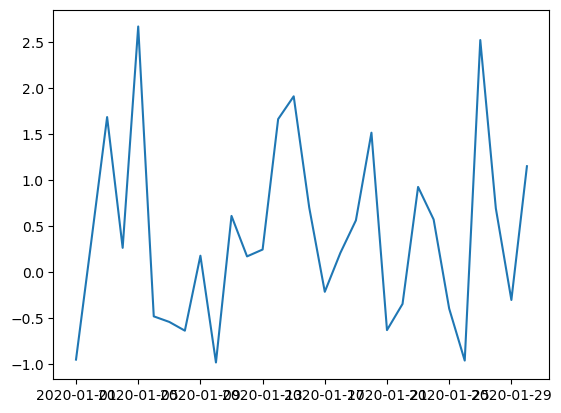

In [47]:
# Generate white noise
mu = 0
sigma = 1
synth_ts["noise"] = rng.normal(mu, sigma, size = N)
plt.plot(synth_ts["noise"])

In [48]:
# Generate a stationary AR(p) driven by the noise
# Start with a characteristic polynomial and derive coefficients

In [49]:
# Generate a trend
if N % 2 == 0:
    adj_to_center = N/2
else:
    adj_to_center = (N - 1)/2
synth_ts["t"] = np.arange(N) - adj_to_center
synth_ts["t2"] = synth_ts["t"]**2

In [50]:
synth_ts

,noise,t,t2
2020-01-01,-0.952578,-15.0,225.0
2020-01-02,0.357504,-14.0,196.0
2020-01-03,1.687633,-13.0,169.0
2020-01-04,0.264103,-12.0,144.0
2020-01-05,2.673997,-11.0,121.0
2020-01-06,-0.481717,-10.0,100.0
2020-01-07,-0.542504,-9.0,81.0
2020-01-08,-0.637542,-8.0,64.0
2020-01-09,0.178654,-7.0,49.0
2020-01-10,-0.983914,-6.0,36.0
